<a href="https://colab.research.google.com/github/Sid2601/Traffic-Signs-Classification/blob/main/Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APPENDIX:

In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).

The dataset consists of 43 different classes of images.

Classes are as listed below:

0 = Speed limit (20km/h)

1 = Speed limit (30km/h)

2 = Speed limit (50km/h)

3 = Speed limit (60km/h)

4 = Speed limit (70km/h)

5 = Speed limit (80km/h)

6 = End of speed limit (80km/h)

7 = Speed limit (100km/h)

8 = Speed limit (120km/h)

9 = No passing

10 = No passing for vehicles over 3.5 metric tons

11 = Right-of-way at the next intersection

12 = Priority road

13 = Yield

14 = Stop

15 = No vehicles

16 = Vehicles over 3.5 metric tons prohibited

17 = No entry

18 = General caution

19 = Dangerous curve to the left

20 = Dangerous curve to the right

21 = Double curve

22 = Bumpy road

23 = Slippery road

24 = Road narrows on the right

25 = Road work

26 = Traffic signals

27 = Pedestrians

28 = Children crossing

29 = Bicycles crossing

30 = Beware of ice/snow

31 = Wild animals crossing

32 = End of all speed and passing limits

33 = Turn right ahead

34 = Turn left ahead

35 = Ahead only

36 = Go straight or right

37 = Go straight or left

38 = Keep right

39 = Keep left

40 = Roundabout mandatory

41 = End of no passing

42 = End of no passing by vehicles over 3.5 metric tons

In [1]:
!unzip traffic-signs-data.zip

Archive:  traffic-signs-data.zip
   creating: traffic-signs-data/
  inflating: traffic-signs-data/test.p  
  inflating: traffic-signs-data/train.p  
  inflating: traffic-signs-data/valid.p  


#import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

#Load Data

In [3]:
#reading data in binary mode
with open("/content/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [5]:
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


18

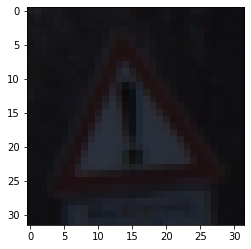

In [8]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

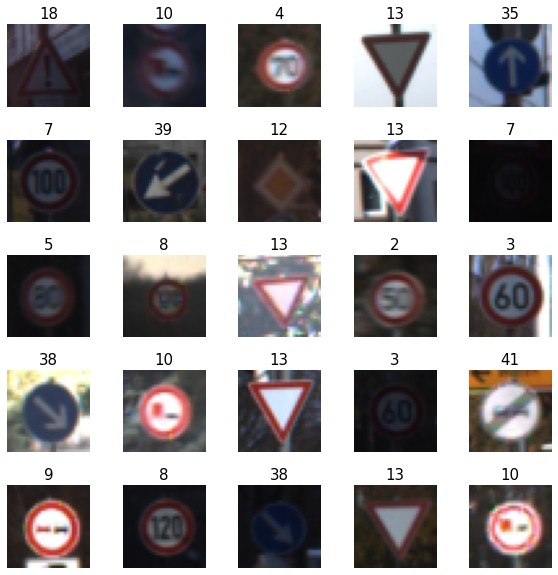

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#Data PreProcessing

In [10]:
#shuffle the data so that no same pattern retrieve
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_valid_gray = np.sum(X_validation/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)

In [12]:
X_train_gray.shape

(34799, 32, 32, 1)

In [13]:
X_train_gray_norm=(X_train_gray -128)/128
X_valid_gray_norm = (X_valid_gray -128)/128
X_test_gray_norm = (X_test-128)/128

In [14]:
X_train_gray_norm

array([[[[-0.79427083],
         [-0.8125    ],
         [-0.765625  ],
         ...,
         [-0.74739583],
         [-0.796875  ],
         [-0.8515625 ]],

        [[-0.84114583],
         [-0.85677083],
         [-0.828125  ],
         ...,
         [-0.78645833],
         [-0.82552083],
         [-0.85416667]],

        [[-0.82291667],
         [-0.859375  ],
         [-0.86197917],
         ...,
         [-0.8203125 ],
         [-0.83854167],
         [-0.8515625 ]],

        ...,

        [[-0.88020833],
         [-0.88020833],
         [-0.8828125 ],
         ...,
         [-0.8984375 ],
         [-0.890625  ],
         [-0.8828125 ]],

        [[-0.88020833],
         [-0.8828125 ],
         [-0.88802083],
         ...,
         [-0.8828125 ],
         [-0.875     ],
         [-0.87760417]],

        [[-0.88020833],
         [-0.88020833],
         [-0.88802083],
         ...,
         [-0.89322917],
         [-0.89322917],
         [-0.89583333]]],


       [[[-0.78385417],


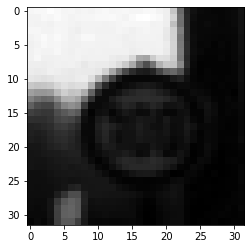

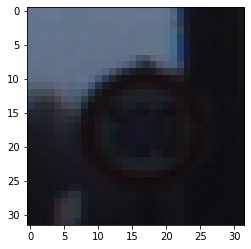

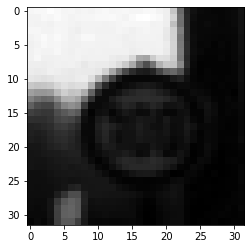

In [15]:
i = random.randint(1, len(X_train_gray))
#squeeze is used for remove single dimension from data
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#CNN MOdel

In [31]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

In [32]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
history = CNN.fit(X_train_gray_norm,y_train,epochs=10,validation_data=(X_valid_gray_norm,y_validation), batch_size=10)

Epoch 1/10
3480/3480 [==============================] - 30s 9ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.3630 - val_accuracy: 0.9279
Epoch 2/10
3480/3480 [==============================] - 29s 8ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.4873 - val_accuracy: 0.9229
Epoch 3/10
3480/3480 [==============================] - 29s 8ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.4337 - val_accuracy: 0.9245
Epoch 4/10
3480/3480 [==============================] - 29s 8ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.5316 - val_accuracy: 0.9138
Epoch 5/10
3480/3480 [==============================] - 30s 8ms/step - loss: 0.0540 - accuracy: 0.9846 - val_loss: 0.4352 - val_accuracy: 0.9413
Epoch 6/10
3480/3480 [==============================] - 29s 8ms/step - loss: 0.0464 - accuracy: 0.9869 - val_loss: 0.6449 - val_accuracy: 0.9204
Epoch 7/10
3480/3480 [==============================] - 29s 8ms/step - loss: 0.0472 - accuracy: 0.9861 - val_loss: 0.4050 - val_ac

In [35]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [37]:
X_test_gray.shape

(12630, 32, 32, 1)

In [43]:
score = CNN.evaluate(X_test_gray, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 73.7627 - accuracy: 0.9009
Test Accuracy: 0.9008709192276001


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

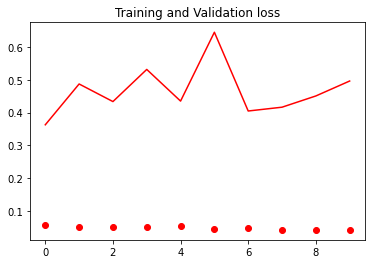

In [45]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validatioon loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

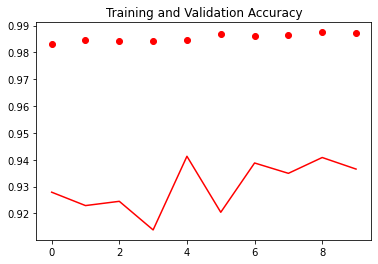

In [46]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validatioon accuracy')
plt.title('Training and Validation Accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


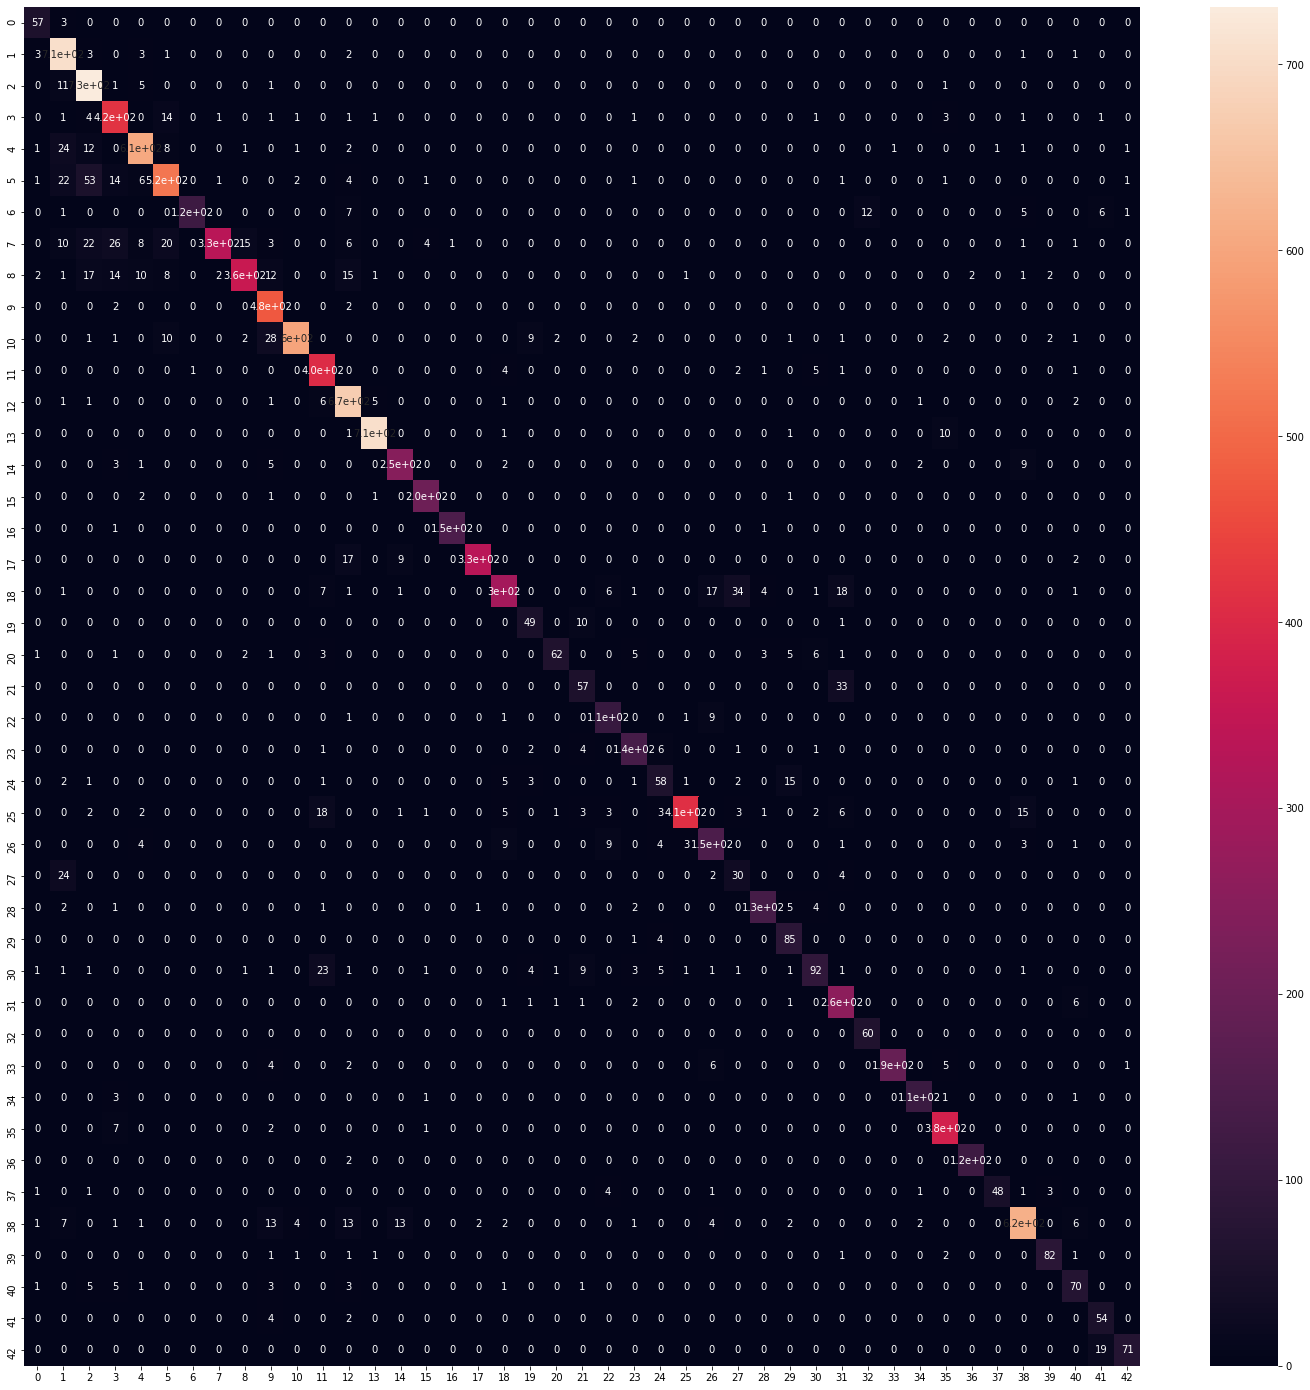

In [48]:
predicted_classes = CNN.predict_classes(X_test_gray)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

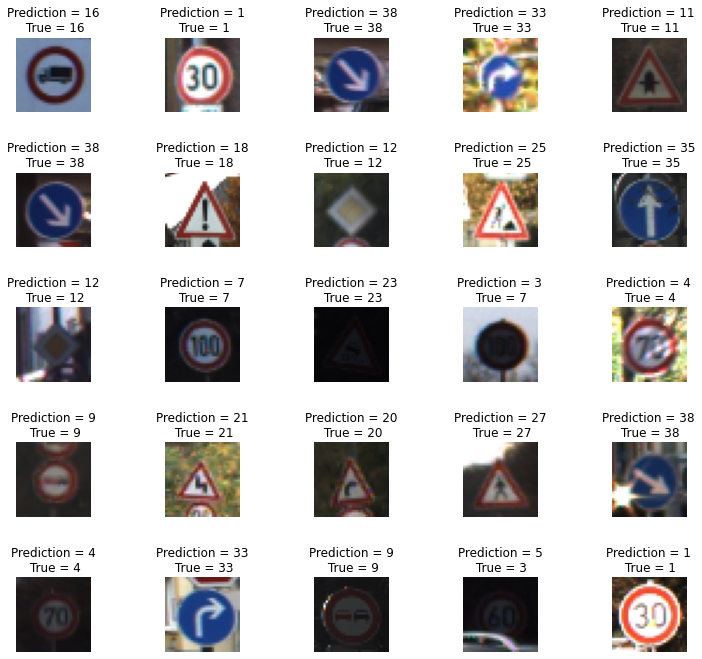

In [49]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    